In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
url = 'https://raw.githubusercontent.com/plotly/datasets/master/2014_usa_states.csv'
pop_df = pd.read_csv(url)
pop_df
# pop_df = pd.read_html(url)

,Rank,State,Postal,Population
0,1,Alabama,AL,4849377.0
1,2,Alaska,AK,736732.0
2,3,Arizona,AZ,6731484.0
3,4,Arkansas,AR,2966369.0
4,5,California,CA,38802500.0
5,6,Colorado,CO,5355866.0
6,7,Connecticut,CT,3596677.0
7,8,Delaware,DE,935614.0
8,9,District of Columbia,DC,658893.0
9,10,Florida,FL,19893297.0


In [3]:
pop_df.drop(['Rank'], axis=1, inplace=True)

In [5]:
population_dict = pop_df.drop(['Postal'], axis=1).set_index('State').T.to_dict('list')


# Pre-processing

In [2]:
'''STEP 1: Pre-processing the dataframes'''
# NY live COVID data
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
df = pd.read_csv(url, parse_dates=[0])  # Cols: date, state, fips, cases, deaths 
df.drop(['fips'], axis=1, inplace=True)

In [14]:
df = df.merge(pop_df.iloc[:,:2], left_on='state', right_on='State')
df.drop('State', axis=1, inplace=True)

,date,state,fips,cases,deaths,Postal
0,2020-01-21,Washington,53,1,0,WA
1,2020-01-22,Washington,53,1,0,WA
2,2020-01-23,Washington,53,1,0,WA
3,2020-01-24,Washington,53,1,0,WA
4,2020-01-25,Washington,53,1,0,WA
...,...,...,...,...,...,...
10873,2020-09-22,West Virginia,54,14384,317,WV
10874,2020-09-23,West Virginia,54,14504,319,WV
10875,2020-09-24,West Virginia,54,14706,325,WV
10876,2020-09-25,West Virginia,54,14953,330,WV


In [6]:
'''STEP 1: Pre-processing the dataframes'''
# NY live COVID data
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
df = pd.read_csv(url, parse_dates=[0])  # Cols: date, state, fips, cases, deaths 

# State population
# Made redundant with plotly dataset
# url = 'https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States_by_population'
# pop_df = pd.read_html(url)[0]
# pop_df = pop_df.iloc[:,2:4]
# pop_df = pop_df.droplevel(0, axis=1)
# pop_df = pop_df[:52]

# def pre_process(total_pop):
#     '''Pre-process population values where in some cases the references might 
#     have '...[..]' pattern signifying reference
#     '''
#     try:
#         num = int(total_pop)
#     except:
#         m = re.match(r'\d+[\d+]', total_pop)
#         num = int(m.group(0))

#     return num

# pop_df.rename(columns={pop_df.columns[1]: 'Recent_population'}, inplace=True)
# pop_df['Recent_population'] = pop_df['Recent_population'].apply(pre_process)
# pop_df.set_index('State').T.to_dict('list')

url = 'https://raw.githubusercontent.com/plotly/datasets/master/2014_usa_states.csv'
pop_df = pd.read_csv(url)
population_dict = pop_df.drop(['Postal'], axis=1).set_index('State').T.to_dict('list')
# If Postal code is needed, we can keep it as the first dict item

'''STEP 2: Merging the dataframes'''

df = df.merge(pop_df.iloc[:,1:3], left_on='state', right_on='State')
df.drop('State', axis=1, inplace=True)

# remove_states = []
# for state in df.state.unique():
#     if state not in population_dict.keys():
#         remove_states.append(state)
        
# df=df[~df.state.isin(remove_states)]
df

,date,state,fips,cases,deaths,Postal
0,2020-01-21,Washington,53,1,0,WA
1,2020-01-22,Washington,53,1,0,WA
2,2020-01-23,Washington,53,1,0,WA
3,2020-01-24,Washington,53,1,0,WA
4,2020-01-25,Washington,53,1,0,WA
...,...,...,...,...,...,...
10977,2020-09-24,West Virginia,54,14706,325,WV
10978,2020-09-25,West Virginia,54,14953,330,WV
10979,2020-09-26,West Virginia,54,15158,332,WV
10980,2020-09-27,West Virginia,54,15348,334,WV


In [13]:
date_df =df.groupby

,state,fips,cases,deaths,Postal
date,,,,,
2020-01-21,Washington,53,1,0,WA
2020-01-22,Washington,53,1,0,WA
2020-01-23,Washington,53,1,0,WA
2020-01-24,Washington,53,1,0,WA
2020-01-25,Washington,53,1,0,WA
...,...,...,...,...,...
2020-09-24,West Virginia,54,14706,325,WV
2020-09-25,West Virginia,54,14953,330,WV
2020-09-26,West Virginia,54,15158,332,WV


In [9]:
population_dict

{'Alabama': [1.0, 4849377.0],
 'Alaska': [2.0, 736732.0],
 'Arizona': [3.0, 6731484.0],
 'Arkansas': [4.0, 2966369.0],
 'California': [5.0, 38802500.0],
 'Colorado': [6.0, 5355866.0],
 'Connecticut': [7.0, 3596677.0],
 'Delaware': [8.0, 935614.0],
 'District of Columbia': [9.0, 658893.0],
 'Florida': [10.0, 19893297.0],
 'Georgia': [11.0, 10097343.0],
 'Hawaii': [12.0, 1419561.0],
 'Idaho': [13.0, 1634464.0],
 'Illinois': [14.0, 12880580.0],
 'Indiana': [15.0, 6596855.0],
 'Iowa': [16.0, 3107126.0],
 'Kansas': [17.0, 2904021.0],
 'Kentucky': [18.0, 4413457.0],
 'Louisiana': [19.0, 4649676.0],
 'Maine': [20.0, 1330089.0],
 'Maryland': [21.0, 5976407.0],
 'Massachusetts': [22.0, 6745408.0],
 'Michigan': [23.0, 9909877.0],
 'Minnesota': [24.0, 5457173.0],
 'Mississippi': [25.0, 2994079.0],
 'Missouri': [26.0, 6063589.0],
 'Montana': [27.0, 1023579.0],
 'Nebraska': [28.0, 1881503.0],
 'Nevada': [29.0, 2839098.0],
 'New Hampshire': [30.0, 1326813.0],
 'New Jersey': [31.0, 8938175.0],
 'New 

In [10]:
df.set_index('date', inplace=True)

state_df = df.groupby('state')

In [11]:
rolling_daily = state_df.rolling(5).mean().diff()

In [12]:
rolling_daily.index #.iloc[0]

MultiIndex([('Alabama', '2020-03-13'),
            ('Alabama', '2020-03-14'),
            ('Alabama', '2020-03-15'),
            ('Alabama', '2020-03-16'),
            ('Alabama', '2020-03-17'),
            ('Alabama', '2020-03-18'),
            ('Alabama', '2020-03-19'),
            ('Alabama', '2020-03-20'),
            ('Alabama', '2020-03-21'),
            ('Alabama', '2020-03-22'),
            ...
            ('Wyoming', '2020-09-19'),
            ('Wyoming', '2020-09-20'),
            ('Wyoming', '2020-09-21'),
            ('Wyoming', '2020-09-22'),
            ('Wyoming', '2020-09-23'),
            ('Wyoming', '2020-09-24'),
            ('Wyoming', '2020-09-25'),
            ('Wyoming', '2020-09-26'),
            ('Wyoming', '2020-09-27'),
            ('Wyoming', '2020-09-28')],
           names=['state', 'date'], length=10982)

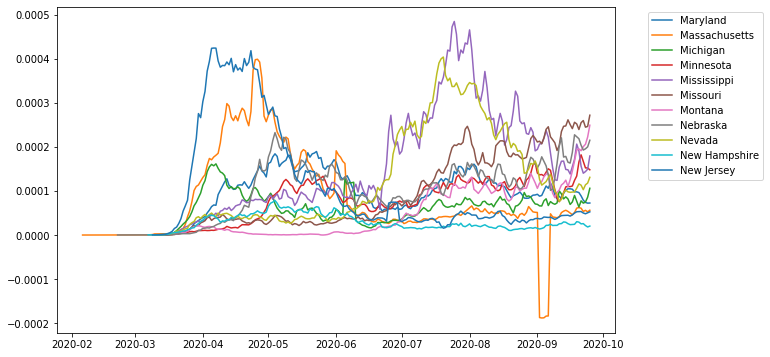

In [35]:
fig, ax = plt.subplots(figsize=(10,6))
for i, (state_name, state) in enumerate(rolling_daily.groupby(level=0)):
    if i<20 or i>30: 
        continue
    total_pop = population_dict[state_name]
    dates = state.index.get_level_values(1)
    ax.plot(dates, state.cases/total_pop, label=state_name)
    
plt.legend(bbox_to_anchor=(1.05, 1));    

## ARIMA

In [46]:
# for i, (state_name, state) in enumerate(rolling_daily.groupby(level=0)):
# rolling_daily.cases

state    date      
Alabama  2020-03-13      NaN
         2020-03-14      NaN
         2020-03-15      NaN
         2020-03-16      NaN
         2020-03-17      NaN
                       ...  
Wyoming  2020-09-21     75.6
         2020-09-22     72.8
         2020-09-23     84.4
         2020-09-24    105.0
         2020-09-25    109.8
Name: cases, Length: 10826, dtype: float64

In [ ]:
def ARIMA_forecast(series, split=0.8, **kwargs):
    L = len(series)
    size = int(np.floor(L*split))
    n_preds = L - size
    
#     size = L - n_preds

    train, test = list(series[:size]), list(series[size:])
    
    mode = kwargs.get('mode', 'Single')
    order = kwargs.get('order', (5,1,0))
    
    history = list(train)#[x for x in train]
    predictions = list()
    
    # 1 by 1
    if mode=='Single':
        predictions, stderr, bounds = [],[],[]
#         print('1 by 1')
        for t in range(len(test)):
            model = ARIMA(history, order=order)
            model_fit = model.fit(disp=0)
            output = model_fit.forecast()
            ypred = round(output[0][0])
            predictions.append(ypred)
            stderr.append(output[1])
            bounds.append(output[2])
            obs = test[t]
            history.append(obs)
            # print(f'predicted={ypred}, expected={obs}')
    
        results = (np.squeeze(predictions), np.squeeze(stderr), np.squeeze(bounds))               
        error = mean_squared_error(test, predictions)
        print(error)
        
    # All at once
    elif mode=='All':
#         print('All at once')
        model = ARIMA(history, order=(5,1,0))
        model_fit = model.fit(disp=0)
        results = model_fit.forecast(steps=n_preds)
        predictions, stderr, bounds = results
        

        error = mean_squared_error(test, predictions)
#         print(error)
#     print(f'Test MSE: {error:0.3f}')
    
    return {'error': error,
            'train': train,
            'test': test,
            'results': results,
           }

# we get daily cases by making the model with cases have d=1. So the result of daily_cases having d=0 is the same
output = ARIMA_forecast(state_df.cases, 0.9, **{'mode':'All'})    

In [19]:
df.date.min()

Timestamp('2020-01-21 00:00:00')

In [20]:
# df['date1'] = 
df['date'].min() -  pd.to_timedelta(5, unit='d')


Timestamp('2020-01-16 00:00:00')

In [99]:
col = 'cases'
df.head()

,date,state,cases,deaths
0,2020-01-21,Washington,1,0
1,2020-01-22,Washington,1,0
2,2020-01-23,Washington,1,0
3,2020-01-24,Illinois,1,0
4,2020-01-24,Washington,1,0


In [40]:
state_df = df.groupby('state')

In [43]:
population_dict

{'Alabama': [4849377.0],
 'Alaska': [736732.0],
 'Arizona': [6731484.0],
 'Arkansas': [2966369.0],
 'California': [38802500.0],
 'Colorado': [5355866.0],
 'Connecticut': [3596677.0],
 'Delaware': [935614.0],
 'District of Columbia': [658893.0],
 'Florida': [19893297.0],
 'Georgia': [10097343.0],
 'Hawaii': [1419561.0],
 'Idaho': [1634464.0],
 'Illinois': [12880580.0],
 'Indiana': [6596855.0],
 'Iowa': [3107126.0],
 'Kansas': [2904021.0],
 'Kentucky': [4413457.0],
 'Louisiana': [4649676.0],
 'Maine': [1330089.0],
 'Maryland': [5976407.0],
 'Massachusetts': [6745408.0],
 'Michigan': [9909877.0],
 'Minnesota': [5457173.0],
 'Mississippi': [2994079.0],
 'Missouri': [6063589.0],
 'Montana': [1023579.0],
 'Nebraska': [1881503.0],
 'Nevada': [2839098.0],
 'New Hampshire': [1326813.0],
 'New Jersey': [8938175.0],
 'New Mexico': [2085572.0],
 'New York': [19746227.0],
 'North Carolina': [9943964.0],
 'North Dakota': [739482.0],
 'Ohio': [11594163.0],
 'Oklahoma': [3878051.0],
 'Oregon': [397023

In [93]:
# df[df.state=='Alabama']
df

,date,state,cases,deaths
0,2020-01-21,Washington,1,0
1,2020-01-22,Washington,1,0
2,2020-01-23,Washington,1,0
3,2020-01-24,Illinois,1,0
4,2020-01-24,Washington,1,0
...,...,...,...,...
11559,2020-09-28,Virginia,146593,3172
11560,2020-09-28,Washington,90596,2199
11561,2020-09-28,West Virginia,15512,337
11562,2020-09-28,Wisconsin,124320,1293


In [101]:
new_df = df.loc[:, ['date', 'state', col]].set_index('date')
new_df

,state,cases
date,,
2020-01-21,Washington,1
2020-01-22,Washington,1
2020-01-23,Washington,1
2020-01-24,Illinois,1
2020-01-24,Washington,1
...,...,...
2020-09-28,Virginia,146593
2020-09-28,Washington,90596
2020-09-28,West Virginia,15512


In [102]:
state_df = new_df.groupby('state')

In [111]:
latest_df = state_df.agg(['last'])

,cases
,last
state,
Alabama,152983
Alaska,8477
Arizona,217513
Arkansas,82049
California,814796
Colorado,69967
Connecticut,57147
Delaware,20389


In [116]:
# latest_df.rename({latest_df.columns[0]: col}, axis='columns')
latest_df = latest_df.droplevel(1, axis=1)  # removing agg of last from column

In [128]:
def population_precent(row):
    pop = population_dict.get(row.name,[10**9])[0]
    percent = row[col]/pop * 100
    return percent

latest_df[f'Total {col} per capita (%)'] = latest_df.apply(population_precent, axis=1)
latest_df

,cases,Total cases per capita (%)
state,,
Alabama,152983,3.154694
Alaska,8477,1.150622
Arizona,217513,3.231279
Arkansas,82049,2.765974
California,814796,2.099854
Colorado,69967,1.306362
Connecticut,57147,1.588883
Delaware,20389,2.179211
District of Columbia,15264,2.316613


In [157]:
s = df[df.state=='Washington'].cases
s.iloc[-2]
# s

89822

In [168]:
series = state_df.apply(lambda x: (x.cases.iloc[-1]-x.cases.iloc[-8]))
series

state
Alabama                      7203
Alaska                        702
Arizona                      3262
Arkansas                     5685
California                  22579
Colorado                     4031
Connecticut                  1123
Delaware                      722
District of Columbia          286
Florida                     15863
Georgia                      8988
Guam                          139
Hawaii                        761
Idaho                        3190
Illinois                    14137
Indiana                      6330
Iowa                         6250
Kansas                       4818
Kentucky                     5098
Louisiana                    3814
Maine                         194
Maryland                     3303
Massachusetts                3276
Michigan                     6127
Minnesota                    6696
Mississippi                  3493
Missouri                    10850
Montana                      2029
Nebraska                     3190
Nevada  

,Week
state,
Alabama,7203
Alaska,702
Arizona,3262
Arkansas,5685
California,22579
Colorado,4031
Connecticut,1123
Delaware,722
District of Columbia,286


In [105]:
rolling_sum = state_df.rolling(5).sum()
rolling_sum #.reset_index()

cases
state   date               
Alabama 2020-03-13      NaN
        2020-03-14      NaN
        2020-03-15      NaN
        2020-03-16      NaN
        2020-03-17    109.0
...                     ...
Wyoming 2020-09-24  25305.0
        2020-09-25  25854.0
        2020-09-26  26375.0
        2020-09-27  26992.0
        2020-09-28  27577.0

[11564 rows x 1 columns]

In [135]:
rolling_sum = rolling_sum.reset_index().groupby('state').agg('last')
rolling_sum = rolling_sum.drop('date', axis=1).rename({col: f'Increase in last week'}, axis=1)

In [137]:
latest_df.merge(rolling_sum, left_index=True, right_index=True)

,cases,Total cases per capita (%),Increase in last week
state,,,
Alabama,152983,3.154694,755759.0
Alaska,8477,1.150622,41228.0
Arizona,217513,3.231279,1083795.0
Arkansas,82049,2.765974,403041.0
California,814796,2.099854,4043112.0
Colorado,69967,1.306362,344663.0
Connecticut,57147,1.588883,283380.0
Delaware,20389,2.179211,100837.0
District of Columbia,15264,2.316613,75998.0


In [141]:
latest_df.round(decimals=3)

,cases,Total cases per capita (%)
state,,
Alabama,152983,3.155
Alaska,8477,1.151
Arizona,217513,3.231
Arkansas,82049,2.766
California,814796,2.100
Colorado,69967,1.306
Connecticut,57147,1.589
Delaware,20389,2.179
District of Columbia,15264,2.317


## TESTING

In [26]:
data = df[df.state=='Washington'].set_index('date')

data

,state,cases,deaths
date,,,
2020-01-21,Washington,1,0
2020-01-22,Washington,1,0
2020-01-23,Washington,1,0
2020-01-24,Washington,1,0
2020-01-25,Washington,1,0
...,...,...,...
2020-09-29,Washington,91011,2218
2020-09-30,Washington,91560,2222
2020-10-01,Washington,92166,2227


In [27]:
data['daily'] = data.cases.diff()
data['rolling_avg']=data['daily'].rolling(5).mean()
data

,state,cases,deaths,daily,rolling_avg
date,,,,,
2020-01-21,Washington,1,0,NaN,NaN
2020-01-22,Washington,1,0,0.0,NaN
2020-01-23,Washington,1,0,0.0,NaN
2020-01-24,Washington,1,0,0.0,NaN
2020-01-25,Washington,1,0,0.0,NaN
...,...,...,...,...,...
2020-09-29,Washington,91011,2218,415.0,482.8
2020-09-30,Washington,91560,2222,549.0,482.2
2020-10-01,Washington,92166,2227,606.0,530.4


In [54]:
data['daily_cases'] = data['cases'].diff()

state_df = data[['cases', 'daily_cases']]

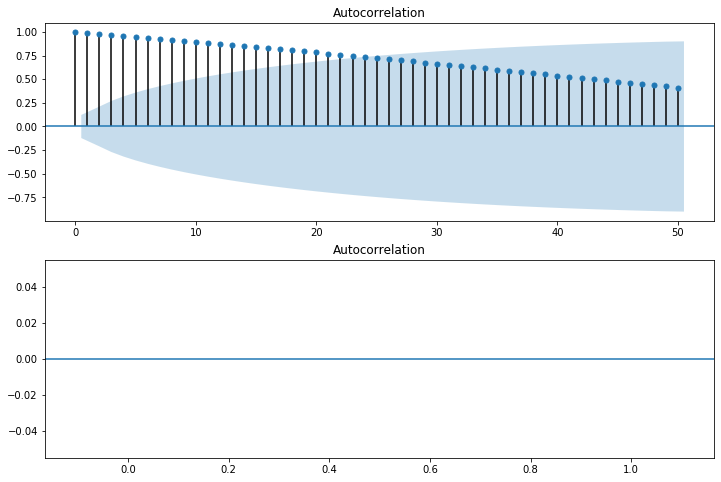

In [55]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(state_df.cases, lags=50, ax=ax1) 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_acf(state_df.daily_cases, lags=50, ax=ax2)

In [56]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.cases.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -4.981458
p-value: 0.000024


In [29]:
past_days = 30

history = list(data.rolling_avg[-past_days:])#[x for x in train]
predictions = list()
history

[519.8,
 436.4,
 461.6,
 386.2,
 385.6,
 361.4,
 445.0,
 444.2,
 494.4,
 425.8,
 466.6,
 419.4,
 424.8,
 428.8,
 481.2,
 405.0,
 389.4,
 417.8,
 426.4,
 491.8,
 542.2,
 596.0,
 542.2,
 517.8,
 510.8,
 482.8,
 482.2,
 530.4,
 581.0,
 512.8]

In [33]:
import datetime

l=[]
for d in range(pred_time):
    l.append(datetime.date.today() + datetime.timedelta(d))
    
l    

[datetime.date(2020, 10, 4),
 datetime.date(2020, 10, 5),
 datetime.date(2020, 10, 6),
 datetime.date(2020, 10, 7),
 datetime.date(2020, 10, 8),
 datetime.date(2020, 10, 9),
 datetime.date(2020, 10, 10)]

In [38]:
pred_ser=pd.Series(predictions, index=l, name='roll_pred')
pred_ser

2020-10-04    493.0
2020-10-05    459.0
2020-10-06    475.0
2020-10-07    467.0
2020-10-08    476.0
2020-10-09    466.0
2020-10-10    471.0
Name: roll_pred, dtype: float64

In [32]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

pred_time = 7
order = (5,0,0)
predictions=[]
bounds = []
for t in range(pred_time):
    model = ARIMA(history, order=order)
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    ypred = round(output[0][0])
    predictions.append(ypred)
    history.append(ypred)
    bounds.append(output[2])
    history.pop(0)
    
predictions    

[493.0, 459.0, 475.0, 467.0, 476.0, 466.0, 471.0]

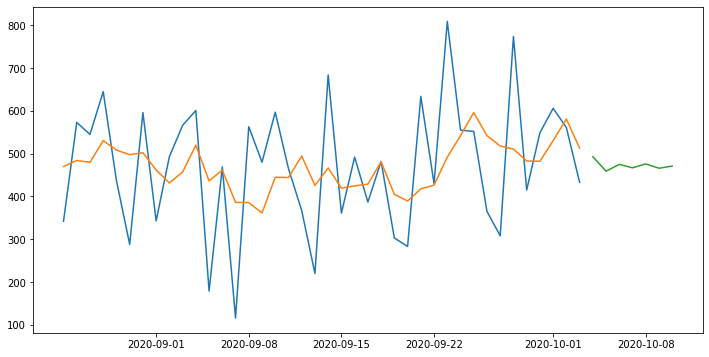

In [44]:
fig, ax = plt.subplots(figsize = (12,6))
plt.plot(data.index[-40:], data.daily[-40:])
plt.plot(data.index[-40:], data.rolling_avg[-40:])
plt.plot(pred_ser.index, pred_ser.to_list())

In [89]:
states_url = 'https://raw.githubusercontent.com/plotly/datasets/master/2014_usa_states.csv'
pop_df = pd.read_csv(states_url)
pop_df.drop(['Rank'], axis=1, inplace=True)
pop_df

,State,Postal,Population
0,Alabama,AL,4849377.0
1,Alaska,AK,736732.0
2,Arizona,AZ,6731484.0
3,Arkansas,AR,2966369.0
4,California,CA,38802500.0
5,Colorado,CO,5355866.0
6,Connecticut,CT,3596677.0
7,Delaware,DE,935614.0
8,District of Columbia,DC,658893.0
9,Florida,FL,19893297.0


In [82]:
url = 'https://simple.wikipedia.org/wiki/List_of_United_States_governors'
gov_df = pd.read_html(url)[0]
# Remove multi-index
gov_df.columns = gov_df.columns.droplevel(0)
gov_df

,State,Portrait,Governor,Party,Party.1,Prior public experience,Inauguration,End of term,Past governors,Unnamed: 9_level_1,Unnamed: 10_level_1
0,Alabama,NaN,Kay Ivey,NaN,Republican,"Lieutenant Governor, Treasurer","April 10, 2017",2023,List,NaN,NaN
1,Alaska,NaN,Mike Dunleavy,NaN,Republican,Alaska Senate,"December 3, 2018",2022,List,NaN,NaN
2,Arizona,NaN,Doug Ducey,NaN,Republican,Treasurer,"January 5, 2015",2023 (term limits),List,NaN,NaN
3,Arkansas,NaN,Asa Hutchinson,NaN,Republican,Under Secretary of Homeland Security for Borde...,"January 13, 2015",2023 (term limits),List,NaN,NaN
4,California,NaN,Gavin Newsom,NaN,Democratic,"Lieutenant Governor, Mayor of San Francisco","January 7, 2019",2023,List,NaN,NaN
5,Colorado,NaN,Jared Polis,NaN,Democratic,"U.S. House, Colorado State Board of Education","January 8, 2019",2023,List,NaN,NaN
6,Connecticut,NaN,Ned Lamont,NaN,Democratic,Greenwich Selectman,"January 9, 2019",2023,List,NaN,NaN
7,Delaware,NaN,John Carney,NaN,Democratic,"U.S. House, Lieutenant Governor of Delaware","January 17, 2017",2021,List,NaN,NaN
8,Florida,NaN,Ron DeSantis,NaN,Republican,U.S. House,"January 8, 2019",2023,List,NaN,NaN
9,Georgia,NaN,Brian Kemp,NaN,Republican,"Secretary of State, Georgia Senate","January 14, 2019",2023,List,NaN,NaN


In [88]:
gov_df = gov_df[['State','Party.1']]
gov_df.rename(columns={'Party.1':'Party'}, inplace=True)
gov_df

,State,Party
0,Alabama,Republican
1,Alaska,Republican
2,Arizona,Republican
3,Arkansas,Republican
4,California,Democratic
5,Colorado,Democratic
6,Connecticut,Democratic
7,Delaware,Democratic
8,Florida,Republican
9,Georgia,Republican


In [90]:
pop_df=pop_df.merge(gov_df, on='State', how='outer')

pop_df

,State,Postal,Population,Party
0,Alabama,AL,4849377.0,Republican
1,Alaska,AK,736732.0,Republican
2,Arizona,AZ,6731484.0,Republican
3,Arkansas,AR,2966369.0,Republican
4,California,CA,38802500.0,Democratic
5,Colorado,CO,5355866.0,Democratic
6,Connecticut,CT,3596677.0,Democratic
7,Delaware,DE,935614.0,Democratic
8,District of Columbia,DC,658893.0,NaN
9,Florida,FL,19893297.0,Republican


In [95]:
pop_df[pop_df.State=='District of Columbia'].loc[:,'Party']='Democratic'
pop_df[pop_df.State=='Minnesota'].Party='Democratic'
pop_df[pop_df.State=='Puerto Rico'].Party='Democratic'
pop_df[pop_df.State=='West Virginia'].Party='Republican'

In [100]:
# pop_df.State==pop_df.State.replace'District of Columbia'].loc[:,'Party']='Democratic'
pop_df.loc[pop_df.State=='District of Columbia', 'Party']='Democratic'
pop_df.loc[pop_df.State=='Minnesota', 'Party']='Democratic'
pop_df.loc[pop_df.State=='Puerto Rico', 'Party']='Democratic'
pop_df.loc[pop_df.State=='West Virginia', 'Party']='Republican'

In [101]:
pop_df

,State,Postal,Population,Party
0,Alabama,AL,4849377.0,Republican
1,Alaska,AK,736732.0,Republican
2,Arizona,AZ,6731484.0,Republican
3,Arkansas,AR,2966369.0,Republican
4,California,CA,38802500.0,Democratic
5,Colorado,CO,5355866.0,Democratic
6,Connecticut,CT,3596677.0,Democratic
7,Delaware,DE,935614.0,Democratic
8,District of Columbia,DC,658893.0,Democratic
9,Florida,FL,19893297.0,Republican


In [102]:
pop_df.to_csv('demographics.csv', index=False)